<a href="https://colab.research.google.com/github/FelipeCatalanPerez/AnalisisSentimientos/blob/main/Analisis_sentimientos_Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de sentimientos Industria minera
Autor: Felipe Catalán

1. Descagar tuits referentes a alguna compania, persona o mercado que ud quiera analizar. Mantenga presente que quiere realizar una estrategia de ventas, o mejorar algun servicio o captar nuevos clientes.

2. Cree un diccionario para analisis de sentimiento.

> > 2.1 Definir 3 palabras positivas y tres negativas. 

3. Desarrolle y calcule alguna metrica que capture el sentimiento. 

4. Presente una estrategia que aborde la problematica planteada en 1.



# Desarrollo

La industria de la minería es un pilar fundamental en la producción del país, llamada también el sueldo de Chile.
Este sector se caracteriza por la exportación de commodities y pocos productos manufacturados en el país.
Es por ello que se busca una estrategia para aumentar la industria relacionada al cobre en el país.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Librerias

In [ ]:
!pip install spacy --quiet
!python -m spacy download es_core_news_md --quiet
!python -m spacy download es_core_news_md --quiet
!python -m spacy download es_core_news_sm --quiet

2022-11-17 04:00:28.340861: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.3 MB 1.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
2022-11-17 04:00:39.445014: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.3 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
2022-11-17 04:00:50.256174: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 12.9 MB 125.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import datetime
import os
import pandas as pd
# Carga librerias
import warnings
warnings.filterwarnings('ignore')
import spacy
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
remove_punct_map = dict.fromkeys(map(ord, string.punctuation))
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
from itertools import compress
from nltk import word_tokenize
import re
from IPython.display import Image

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
esp_stop = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
%reload_ext rpy2.ipython

### Configurar directorio donde guardar el proyecto


In [ ]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
%ls

'Colab Notebooks'/      TareaFinalPLN/   twint/
 Ejemplo_SS_2022_DAM/   Trabajo_Final/


In [ ]:
%mkdir 'Trabajo_Final'

mkdir: cannot create directory ‘Trabajo_Final’: File exists


In [ ]:
cd 'Trabajo_Final'

/content/gdrive/MyDrive/Trabajo_Final


### Clonando repositorio

In [ ]:
!git clone "https://github.com/sebabecerra/twint.git"


fatal: destination path 'twint' already exists and is not an empty directory.


In [ ]:
%cd '/content/gdrive/MyDrive/Trabajo_Final/twint'

/content/gdrive/MyDrive/Trabajo_Final/twint


In [ ]:
!pip3 install . -r requirements.txt
#import twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/gdrive/MyDrive/Trabajo_Final/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=983896361545dc200e7e9c6e4f77fdf78022fce6b9b2a332a88193a4c8592f1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-ea6xncvn/wheels/75/93/df/ab84859c9a7c5add5495db58f7e9ac2d6c1e6cb937a7819c80
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21

## 1.- Obteniendo la Data

In [ ]:
%%capture
%%shell
Cuentas=('CodelcoChile' 'mineriachilena' 'nuevamineria' 'Sonami_Chile')
cd '/content/gdrive/MyDrive/Trabajo_Final/twint'
CUR_DATE=`date +%Y-%m-%d`
mkdir "$CUR_DATE"
cd "$CUR_DATE"
for variable in ${Cuentas[@]};
do
twint -s $variable -o $variable.csv --csv
done

In [ ]:
ruta= '/content/gdrive/MyDrive/Trabajo_Final/twint/2022-11-14'
appended_data = []
for file in os.listdir(ruta):
    db = pd.read_csv(ruta  + "/" + file, sep="\t")
    appended_data.append(db)
appended_data = pd.concat(appended_data)
appended_data = appended_data[["date", "time", "username", "tweet"]]
appended_data.to_csv(ruta + "Total_" + ".csv",sep='\t')

In [ ]:
appended_data

In [ ]:
d1 = datetime.date.today().strftime("%Y-%m-%d")
ruta= '/content/gdrive/MyDrive/Trabajo_Final/twint/'
appended_data = []
for file in os.listdir(ruta + str(d1)):
    df = pd.read_csv(ruta + str(d1) + "/" + file, sep="\t")
    appended_data.append(df)
appended_data = pd.concat(appended_data)
appended_data = appended_data[["date", "time", "username", "tweet"]]
appended_data.to_csv(ruta + "Total_" + str(d1) + ".csv",sep='\t')

In [ ]:
appended_data=pd.read_csv('/content/gdrive/MyDrive/Trabajo_Final/twint/2022-11-14Total_.csv', sep="\t")

In [ ]:
!pip install demoji
import demoji

text="🤑🤑🤑🤑🤑"
emoji_less_text = demoji.replace(text, "")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 


## 2.- Preparando nube de bigrama

In [ ]:
punctuations = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿»1234567890%'''

ngramos_bi = []
bi_tokens = []
for ix in range(appended_data.shape[0]):
  mytext = appended_data.iloc[ix].tweet
  #Removing hashtags and mentions
  mytext = re.sub("@[A-Za-z0-9_]+","", mytext)
  mytext = re.sub("#[A-Za-z0-9_]+","", mytext)
  #Removing links
  mytext = re.sub(r"http\S+", "", mytext)
  mytext = re.sub(r"www.\S+", "", mytext)
  #Removing punctuations
  mytext = re.sub('[()!?]', ' ', mytext)
  mytext = re.sub('\[.*?\]',' ', mytext)
  mytext = str(mytext).replace('  ', "").replace('\n\n', "").replace('[', "").replace(']', "").replace('\n', "").replace('\r', " ").replace('\t', " ").strip()
  mytext = mytext.translate(str.maketrans('', '', punctuations)).lower().strip()
  #Filtering non-alphanumeric characters
  #mytext = re.sub("[^a-z0-9]"," ", mytext)
  mytext = demoji.replace(mytext, "")
  tokens = word_tokenize(mytext)
  tokens = [x for x in tokens if x not in esp_stop]
  if len(tokens)>1:
    bi_tokens = [' '.join(x) for x in list(nltk.bigrams(tokens))]
  ngramos_bi.extend(bi_tokens)

ngram_bi = pd.DataFrame(list(zip(ngramos_bi)), columns =['ngram_bi']) 
ngram_count_bi = ngram_bi['ngram_bi'].value_counts().rename_axis('ngram_bi').reset_index(name='counts')
print(ngram_count_bi.head(10), "\n", 
      "Numero de Registros", len(ngram_count_bi))

                      ngram_bi  counts
0               distrito norte      72
1                 precio cobre      69
2              reducir consumo      64
3     desalinizadora tocopilla      64
4             consumo unitario      64
5           compromiso reducir      64
6               unitario aguas      64
7          aguas continentales      64
8  construcción desalinizadora      61
9       iniciamos construcción      61 
 Numero de Registros 4063


In [ ]:
tokens

['sabe', 'placido', 'domingo', 'justicia', 'económica']

In [ ]:
ngram_count_bi

### Grafico 1: Nube con 2 palabras

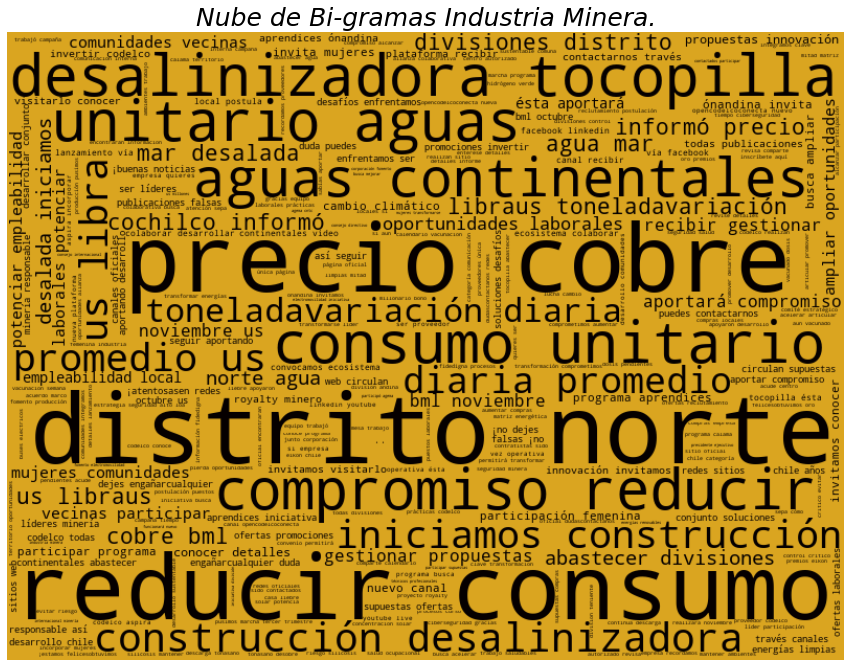

In [ ]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# Pregunta 1. Wordcloud por bigrama
data = dict(zip(ngram_count_bi['ngram_bi'].tolist(), ngram_count_bi['counts'].tolist()))
wc = WordCloud(background_color='goldenrod',width=800, height=600, max_words=500).generate_from_frequencies(data)
wc.recolor(color_func = black_color_func)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Bi-gramas Industria Minera.",
          fontsize='25',
          loc="center",
          #backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

## 2.1. Preparando nube de palabras

In [ ]:
appended_data.columns

Index(['Unnamed: 0', 'date', 'time', 'username', 'tweet'], dtype='object')

In [ ]:
df=appended_data[['date', 'tweet']]
df.head(20)

,date,tweet
0,2022-11-13,"Te invitamos a conocer OpenCodelco-Conecta, nu..."
1,2022-11-13,Para abastecer a las divisiones del Distrito N...
2,2022-11-12,Convocamos a todo el ecosistema a colaborar pa...
3,2022-11-12,¡Atención! Todas las ofertas de reclutamiento ...
4,2022-11-11,En el marco del plan “Sponsor de la Educación”...
5,2022-11-11,Uno de los principales minerales que produce C...
6,2022-11-11,El desarrollo de las comunidades que integramo...
7,2022-11-11,¡Extendimos el plazo! Hasta el 17 de noviembre...
8,2022-11-11,Presentamos nuestro nuevo canal OpenCodelco-Co...
9,2022-11-10,¡Ojo! Algunos contratistas han sido contactado...


### Pre-procesamiento

In [ ]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].replace("  ", " ")
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', punctuations1))
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', digits))
df['tweet'] = df['tweet'].str.translate(str.maketrans('áéíóúÁÉÍÓÚ', 'aeiouAEIOU'))
df['tweet'] = df['tweet'].str.strip()
df = df[df['tweet'].str.len()>2]
df= df[df['tweet'] != ""]
#df = df.reset_index()
print(df.head(10), "\n",
      "Numero de Registros", len(df))

         date                                              tweet
0  2022-11-13  te invitamos a conocer opencodelcoconecta nues...
1  2022-11-13  para abastecer a las divisiones del distrito n...
2  2022-11-12  convocamos a todo el ecosistema a colaborar pa...
3  2022-11-12  ¡atencion todas las ofertas de reclutamiento y...
4  2022-11-11  en el marco del plan sponsor de la educacion d...
5  2022-11-11  uno de los principales minerales que produce c...
6  2022-11-11  el desarrollo de las comunidades que integramo...
7  2022-11-11  ¡extendimos el plazo hasta el  de noviembre po...
8  2022-11-11  presentamos nuestro nuevo canal opencodelcocon...
9  2022-11-10  ¡ojo algunos contratistas han sido contactados... 
 Numero de Registros 1534


### Tokenizar

In [ ]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df)):
  # Rescata la frase escrita sobre el tema
  frase = df.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [ ]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens.head(10))
print("Total de Palabras", len(df_tokens))

Primera 10 palabras de las frases 
                 token
0                  te
1           invitamos
2                   a
3             conocer
4  opencodelcoconecta
5             nuestra
6               nueva
7          plataforma
8                para
9             recibir
Total de Palabras 39191


In [ ]:
esp_stop.append('🔴el')
esp_stop.append('goreantofagasta')
esp_stop.append('➡️')
esp_stop.append('httpstcosdeeihti')
esp_stop.append('httpstcovgcbzhosy')
esp_stop.append('⛏️')
esp_stop.append('httpstcoencraomns')
esp_stop.append('httpstcocodrddln')
esp_stop.append('🚨')
esp_stop.append('abra')
esp_stop.append('httpstcormmgqiyzz')
esp_stop.append('httpstcoontrtdzpl')
esp_stop.append('httpstcofglnwk')
esp_stop.append('httpstcogakmivuot')
esp_stop.append('📢')
esp_stop.append('🔴')
esp_stop.append('mas')
esp_stop.append('httpstcowekdfzzxtp')
esp_stop.append('ser')
esp_stop.append('httpstcodcqzgzk')
esp_stop.append('httpstcosmopcxui')
esp_stop.append('httpstcowwkhcpqlg')
esp_stop.append('httpstcodimwwvhada')
esp_stop.append('asi')
esp_stop.append('aqui')
esp_stop.append('📡')
esp_stop.append('httpstcozzkwyvael')
esp_stop.append('httpstcorbyod')
esp_stop.append('si')
esp_stop.append('codelco')
esp_stop.append('mineria')
esp_stop.append('chile')
esp_stop.append('codelcochile')
esp_stop.append('codelcochile')
esp_stop.append('codelcochile')
esp_stop.append('codelcochile')
esp_stop.append('codelcochile')



In [ ]:
# Se eliminan las stopwords
# se pueden agreggar mas stopwords
df_tokens_clean = df_tokens[~df_tokens.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean))

Primera 10 palabras de las frases limpias 
                  token
1            invitamos
3              conocer
4   opencodelcoconecta
6                nueva
7           plataforma
9              recibir
11           gestionar
12          propuestas
14          innovacion
16           invitamos
None
Total de Palabras Limpias 22808


In [ ]:
df_tokens_clean['token'] = df_tokens_clean['token'].replace("mineriachilena","mineria",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("codelcosetransforma","transforma",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("codelcochile","codelco",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("codelcoinnovacionabierta","innovacion",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("mineriachilena","mineria",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("aguas","agua",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("innovaciones","innovacion",regex=True)
df_tokens_clean['token'] = df_tokens_clean['token'].replace("cambioclimatico","climatico",regex=True)

# Frecuencia de palabras
tokens_count = df_tokens_clean['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count = tokens_count[tokens_count.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count.head(10), "\n",
      "Numero de registros", len(tokens_count))

Frecuencia de Palabras 
         token  counts
0          us     191
1     mineria     165
2       cobre     145
3  innovacion     136
4        agua     133
5       libra     124
6   noviembre     109
7  transforma     104
8  compromiso     102
9    programa      97 
 Numero de registros 1552


### Grafico 2: Nube con 1 palabra

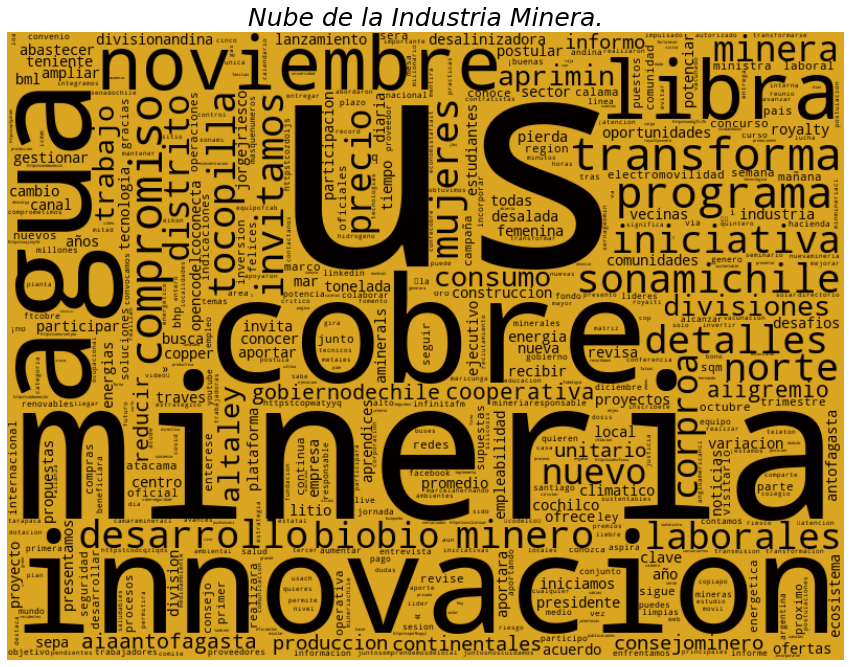

In [ ]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# Pregunta 1. Wordcloud por token
data = dict(zip(tokens_count['token'].tolist(), tokens_count['counts'].tolist()))
wc = WordCloud(background_color='goldenrod',width=800, height=600, max_words=500).generate_from_frequencies(data)
wc.recolor(color_func = black_color_func)

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de la Industria Minera.",
          fontsize='25',
          loc="center",
          #backgroundcolor='white',
          color='black',
          fontstyle='italic')
plt.show()

## 3.- Palabras positivas y negativas

In [ ]:
negativas=["sequia","climatico","mentira"]
positivas=["construccion", "innovacion", "tecnologias"]

In [ ]:
tokens_count['negativas']=tokens_count.token.str.count('|'.join(negativas))


In [ ]:
tokens_count['positivas']=tokens_count.token.str.count('|'.join(positivas))


In [ ]:
tokens_count.columns

Index(['token', 'counts', 'negativas', 'positivas'], dtype='object')

In [ ]:
tokens_count

In [ ]:
# Guardando Sentimiento
Sentimiento = tokens_count[['token', 'counts', 'negativas', 'positivas']]

In [ ]:
Sentimiento

### Total de palabras por Sentimiento

In [ ]:
Sentimiento['Neg_total'] = Sentimiento['negativas'] * Sentimiento['counts']
negativas_sum = Sentimiento['Neg_total'].sum()
negativas_sum

60

In [ ]:
Sentimiento['Pos_total'] = Sentimiento['positivas'] * Sentimiento['counts']
positivas_sum = Sentimiento['Pos_total'].sum()
positivas_sum

208

### Palabras por Sentimiento

In [ ]:
positivas_total = Sentimiento[Sentimiento['positivas'] > 0]
positivas_total = positivas_total[['token','counts']]
positivas_total

,token,counts
3,innovacion,136
47,construccion,60
374,tecnologias,12


In [ ]:
negativas_total = Sentimiento[Sentimiento['negativas'] > 0]
negativas_total = negativas_total[['token','counts']]
negativas_total

,token,counts
90,climatico,38
327,mentira,14
748,sequia,8


### Generación de métrica

In [ ]:
metrica= positivas_sum/negativas_sum
metrica

3.466666666666667

In [ ]:
!git clone "https://github.com/FelipeCatalanPerez/AnalisisSentimientos.git"

fatal: destination path 'AnalisisSentimientos' already exists and is not an empty directory.
